In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram

RND = 42
np.random.seed(RND)

In [ ]:

# 1. Load dataset & initial exploration
file_path = '/Fragrance Dataset - COM7022 - [4037].csv'
df = pd.read_csv(file_path)


In [3]:
print("=== Initial Dataset Overview ===")
print("Shape:", df.shape)

=== Initial Dataset Overview ===
Shape: (1000, 10)


In [4]:
print("\nData types and non-null counts:")
print(df.info())



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              999 non-null    object 
 1   title              1000 non-null   object 
 2   type               997 non-null    object 
 3   price              996 non-null    float64
 4   priceWithCurrency  1000 non-null   object 
 5   available          889 non-null    float64
 6   availableText      997 non-null    object 
 7   sold               994 non-null    float64
 8   lastUpdated        947 non-null    object 
 9   itemLocation       1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.3+ KB
None


In [5]:
print("\nFirst 8 rows:")
display(df.head(8))


First 8 rows:


,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States"
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada"
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States"
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,NaN,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States"
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States"
5,Multiple Brands,Men's Perfume Sampler 10pcs Sample Vials Desig...,Perfume,14.99,US $14.99,10.0,More than 10 available / 79 sold,79.0,"May 23, 2024 06:57:41 PDT","Houston, Texas, United States"
6,Maison Alhambra,Glacier Bold by Maison Alhambra 3.4oz EDP for ...,Eau de Parfum,30.99,US $30.99/ea,9.0,9 available / 39 sold,39.0,"May 16, 2024 13:42:49 PDT","Englewood Cliffs, New Jersey, United States"
7,Unbranded,Parfums De-Marly-Haltane Eau de Parfum spray 4...,Eau de Parfum,85.00,US $85.00,NaN,Last One / 6 sold,6.0,"May 24, 2024 00:10:39 PDT","Ithaca, New York, United States"


In [6]:
print("\nMissing values per column:")
display(df.isnull().sum())


Missing values per column:


,0
brand,1
title,0
type,3
price,4
priceWithCurrency,0
available,111
availableText,3
sold,6
lastUpdated,53
itemLocation,0


In [7]:
print("\nDescribe (all columns):")
display(df.describe(include='all').T)


Describe (all columns):


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand,999,246,Giorgio Armani,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,1000,966,YSL Yves Saint Laurent Y Eau de Perfume Spray ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,997,63,Eau de Toilette,444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,996.0,NaN,NaN,NaN,46.497279,35.590865,3.0,22.99,35.71,59.0,259.09
priceWithCurrency,1000,685,US $29.99/ea,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
available,889.0,NaN,NaN,NaN,20.046119,61.547985,2.0,5.0,10.0,10.0,842.0
availableText,997,758,More than 10 available / 16 sold,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sold,994.0,NaN,NaN,NaN,766.2666,3200.971733,1.0,14.0,49.5,320.5,54052.0
lastUpdated,947,933,"May 24, 2024 10:26:59 PDT",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
itemLocation,1000,276,"Dallas, Texas, United States",126,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Identify column types
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nNumeric columns:", num_cols)
print("Categorical columns:", cat_cols)


Numeric columns: ['price', 'available', 'sold']
Categorical columns: ['brand', 'title', 'type', 'priceWithCurrency', 'availableText', 'lastUpdated', 'itemLocation']


In [ ]:

# 2. Preprocessing: Missing values, outliers, encoding, scaling
# 2.1 Missing values - before
print("\n=== Missing Values (Before) ===")
print(df.isnull().sum())


=== Missing Values (Before) ===
brand                  1
title                  0
type                   3
price                  4
priceWithCurrency      0
available            111
availableText          3
sold                   6
lastUpdated           53
itemLocation           0
dtype: int64


In [11]:
# Strategies and justifications:
# - Numeric: mean imputation (simple, preserves average; ok if missingness small)
# - Categorical: mode imputation (preserves most frequent category)
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers in-place for df
for c in num_cols:
    if df[c].isnull().sum() > 0:
        df[c] = num_imputer.fit_transform(df[[c]])
for c in cat_cols:
    if df[c].isnull().sum() > 0:
        df[c] = cat_imputer.fit_transform(df[[c]]).ravel()


print("\n=== Missing Values (After) ===")
print(df.isnull().sum())



=== Missing Values (After) ===
brand                0
title                0
type                 0
price                0
priceWithCurrency    0
available            0
availableText        0
sold                 0
lastUpdated          0
itemLocation         0
dtype: int64


In [12]:
# 2.2 Outlier handling (IQR capping) — show boundaries first for transparency
print("\n=== Outlier detection (IQR) — boundaries per numeric column ===")
iqr_bounds = {}
for c in num_cols:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    iqr_bounds[c] = (lower, upper)
    print(f"{c}: lower={lower:.3f}, upper={upper:.3f}")

print("\nSummary stats BEFORE outlier capping:")
display(df[num_cols].describe().T)


=== Outlier detection (IQR) — boundaries per numeric column ===
price: lower=-31.025, upper=113.015
available: lower=-2.500, upper=17.500
sold: lower=-463.000, upper=809.000

Summary stats BEFORE outlier capping:


,count,mean,std,min,25%,50%,75%,max
price,1000.0,46.497279,35.519540,3.0,22.99,35.99,59.0,259.09
available,1000.0,20.046119,58.027996,2.0,5.00,10.00,10.0,842.00
sold,1000.0,766.266600,3191.344729,1.0,14.00,51.00,332.0,54052.00


In [13]:
# Cap outliers (replace below lower by lower and above upper by upper)
for c in num_cols:
    lower, upper = iqr_bounds[c]
    df[c] = np.where(df[c] < lower, lower, df[c])
    df[c] = np.where(df[c] > upper, upper, df[c])

print("\nSummary stats AFTER outlier capping:")
display(df[num_cols].describe().T)


Summary stats AFTER outlier capping:


,count,mean,std,min,25%,50%,75%,max
price,1000.0,44.328929,28.563263,3.0,22.99,35.99,59.0,113.015
available,1000.0,9.463000,5.020043,2.0,5.00,10.00,10.0,17.500
sold,1000.0,215.473600,289.400016,1.0,14.00,51.00,332.0,809.000


In [ ]:
# 2.3 Encoding categorical features
print("\n=== Encoding categorical features ===")
# label encode all categorical columns (simple and reversible using stored encoders)
encoders = {}
for c in cat_cols:
    le = LabelEncoder()
    # fill missing (none or already filled), ensure string type
    df[c] = df[c].astype(str)
    df[c] = le.fit_transform(df[c])
    encoders[c] = le
print("Categorical columns encoded with LabelEncoder. Sample:")
display(df[cat_cols].head())


=== Encoding categorical features ===
Categorical columns encoded with LabelEncoder. Sample:


,brand,title,type,priceWithCurrency,availableText,lastUpdated,itemLocation
0,68,228,25,635,584,908,5
1,3,33,25,17,420,691,13
2,223,430,29,10,645,501,59
3,96,68,29,445,89,750,210
4,141,547,44,110,522,826,25


In [15]:
# 2.4 Feature selection: decide which features to include for clustering
# For this analysis we'll use numeric columns (price, available, sold) by default.
# You may set include_encoded_cat=True to also include encoded categorical variables (brand/type).
include_encoded_cat = False

if include_encoded_cat:
    # choose top encoded categorical columns to include or all
    encoded_cols = cat_cols  # or subset like ['brand','type'] if present
    features = num_cols + encoded_cols
else:
    features = num_cols.copy()

print("\nFeatures used for clustering:", features)


Features used for clustering: ['price', 'available', 'sold']


In [ ]:
# 2.5 Scaling: StandardScaler (default) — justified for distance-based clustering
scaler_choice = 'standard'  # 'standard' or 'minmax'
if scaler_choice == 'standard':
    scaler = StandardScaler()
else:
    scaler = MinMaxScaler()

X_raw = df[features].copy()  
X = X_raw.fillna(X_raw.mean())  
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("\nScaled feature summary (should have mean ~0 and std ~1 for StandardScaler):")
display(X_scaled_df.describe().round(3))


Scaled feature summary (should have mean ~0 and std ~1 for StandardScaler):


,price,available,sold
count,1000.000,1000.000,1000.000
mean,-0.000,0.000,0.000
std,1.001,1.001,1.001
min,-1.448,-1.487,-0.741
25%,-0.747,-0.889,-0.697
50%,-0.292,0.107,-0.569
75%,0.514,0.107,0.403
max,2.406,1.602,2.052


In [17]:
# Before vs After comparison (means and std)
before_stats = X_raw.describe().T[['mean', 'std']].rename(columns={'mean':'mean_before','std':'std_before'})
after_stats = X_scaled_df.describe().T[['mean','std']].rename(columns={'mean':'mean_after','std':'std_after'})
comparison = before_stats.join(after_stats)
print("\nBefore vs After scaling:")
display(comparison.round(4))


Before vs After scaling:


,mean_before,std_before,mean_after,std_after
price,44.3289,28.5633,-0.0,1.0005
available,9.4630,5.0200,0.0,1.0005
sold,215.4736,289.4000,0.0,1.0005


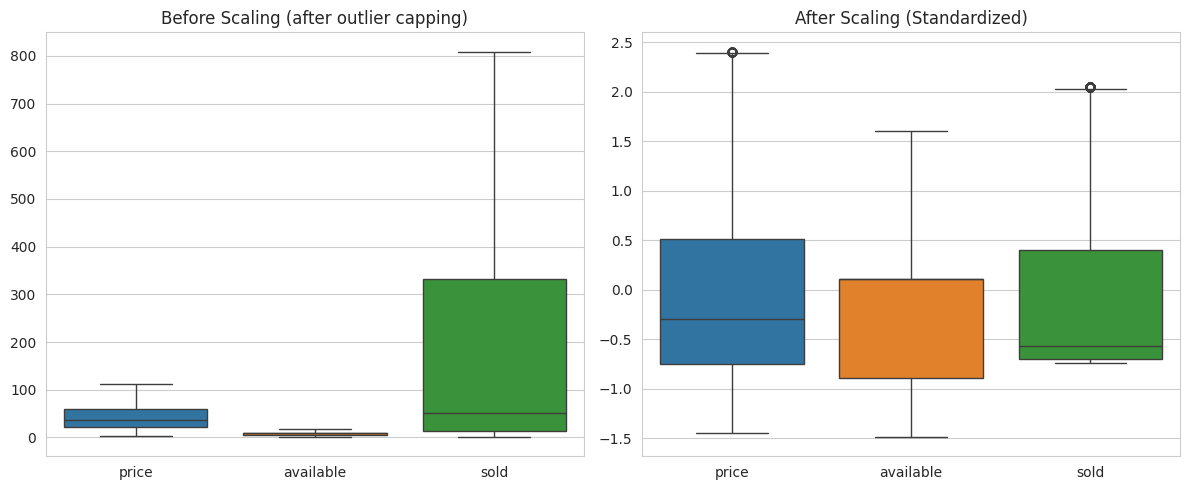

In [18]:
# Visual confirmation: boxplots before and after
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_raw)
plt.title("Before Scaling (after outlier capping)")
plt.subplot(1,2,2)
sns.boxplot(data=X_scaled_df)
plt.title("After Scaling (Standardized)")
plt.tight_layout()
plt.show()


In [ ]:

# 3. Clustering modelling process (KMeans, Agglomerative, DBSCAN)

# Helper: evaluate model (internal metrics)
def evaluate_labels(X_arr, labels):
    res = {}
    labels = np.array(labels)
    # remove noise for DBSCAN metrics
    mask = labels != -1
    if mask.sum() <= 1 or len(set(labels[mask])) <= 1:
        res['n_clusters'] = len(set(labels[mask])) if mask.sum() > 0 else 0
        res['n_noise'] = int((labels == -1).sum()) if -1 in labels else 0
        res['silhouette'] = np.nan
        res['davies_bouldin'] = np.nan
        res['calinski_harabasz'] = np.nan
    else:
        res['n_clusters'] = len(set(labels[mask]))
        res['n_noise'] = int((labels == -1).sum()) if -1 in labels else 0
        res['silhouette'] = silhouette_score(X_arr[mask], labels[mask])
        res['davies_bouldin'] = davies_bouldin_score(X_arr[mask], labels[mask])
        res['calinski_harabasz'] = calinski_harabasz_score(X_arr[mask], labels[mask])
    return res


=== K-Means: Elbow & Silhouette for k selection ===


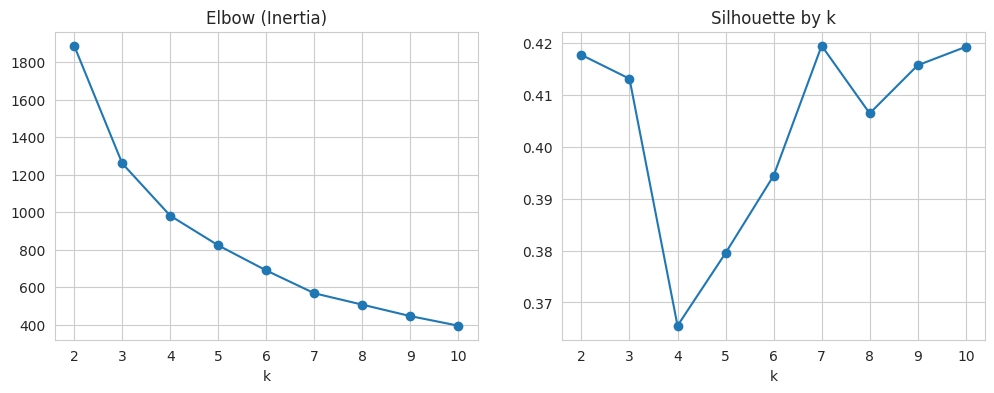

In [ ]:
X_arr = X_scaled  # array form for sklearn metrics


# 3.A K-Means: elbow and silhouette to find k

print("\n=== K-Means: Elbow & Silhouette for k selection ===")
K_range = list(range(2, 11))
inertias = []
sil_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=RND, n_init=10)
    labs = km.fit_predict(X_arr)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_arr, labs) if len(set(labs))>1 else np.nan)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(K_range, inertias, '-o'); plt.title('Elbow (Inertia)'); plt.xlabel('k'); plt.grid(True)
plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, '-o'); plt.title('Silhouette by k'); plt.xlabel('k'); plt.grid(True)
plt.show()

In [23]:
best_k = K_range[int(np.nanargmax(sil_scores))]
print("Chosen k by silhouette:", best_k, "-> silhouette:", max(sil_scores))

# Fit final KMeans
kmeans = KMeans(n_clusters=best_k, random_state=RND, n_init=30)
labels_km = kmeans.fit_predict(X_arr)
print("KMeans cluster sizes:")
print(pd.Series(labels_km).value_counts().sort_index())

Chosen k by silhouette: 7 -> silhouette: 0.41950405989136963
KMeans cluster sizes:
0    211
1    287
2    107
3    171
4     45
5    106
6     73
Name: count, dtype: int64


In [25]:
# Centroids back to original numeric scale for interpretation:
if scaler_choice == 'standard':
    centroids_scaled_df = pd.DataFrame(kmeans.cluster_centers_, columns=features)
    # Inverse transform only for numeric features portion (encoded cat may be present)
    centroids_orig_vals = scaler.inverse_transform(centroids_scaled_df)
    centroids_orig_df = pd.DataFrame(centroids_orig_vals, columns=features)
    print("\nKMeans centroids (approx. original scale):")
    display(centroids_orig_df.round(3))
else:
    print("\nKMeans centroids (scaled space):")
    display(pd.DataFrame(kmeans.cluster_centers_, columns=features).round(3))



KMeans centroids (approx. original scale):


,price,available,sold
0,32.834,3.682,53.502
1,29.510,9.554,73.087
2,34.429,17.486,770.822
3,87.617,6.649,49.871
4,98.363,16.300,263.240
5,34.280,8.811,664.008
6,30.211,17.377,136.603



=== Hierarchical Clustering (Ward) ===


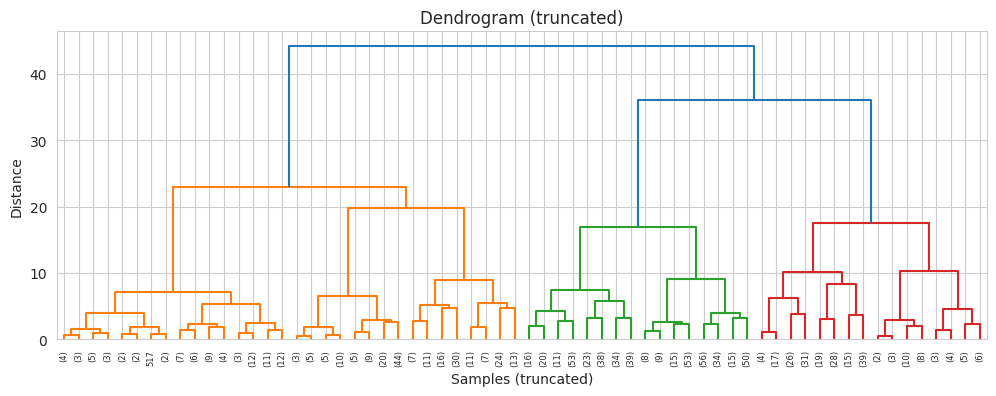

Agglomerative cluster sizes:
0     41
1    119
2    179
3     86
4    101
5    240
6    234
Name: count, dtype: int64


In [ ]:

# 3.B Hierarchical (Agglomerative) with Ward

print("\n=== Hierarchical Clustering (Ward) ===")
# Dendrogram (truncated)
Z = linkage(X_arr, method='ward')
plt.figure(figsize=(12,4))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram (truncated)')
plt.xlabel('Samples (truncated)')
plt.ylabel('Distance')
plt.show()

agg = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
labels_agg = agg.fit_predict(X_arr)
print("Agglomerative cluster sizes:")
print(pd.Series(labels_agg).value_counts().sort_index())



=== DBSCAN: eps selection using k-distance plot (k=4) ===


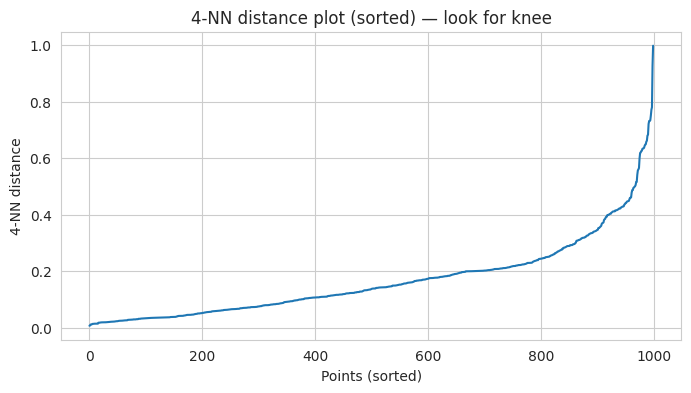

In [ ]:

# 3.C DBSCAN with eps heuristic (k-distance)

print("\n=== DBSCAN: eps selection using k-distance plot (k=4) ===")
k_nn = 4
nbrs = NearestNeighbors(n_neighbors=k_nn).fit(X_arr)
distances, indices = nbrs.kneighbors(X_arr)
k_dist = np.sort(distances[:, -1])

plt.figure(figsize=(8,4))
plt.plot(k_dist)
plt.title(f'{k_nn}-NN distance plot (sorted) — look for knee')
plt.xlabel('Points (sorted)')
plt.ylabel(f'{k_nn}-NN distance')
plt.grid(True)
plt.show()

In [28]:
eps_guess = float(np.percentile(k_dist, 90))
candidates = np.linspace(max(0.05, eps_guess*0.5), eps_guess*1.4, 6).round(4)
print("Heuristic eps candidates:", candidates)

Heuristic eps candidates: [0.1723 0.2343 0.2963 0.3584 0.4204 0.4824]


In [29]:
best_dbscan_labels = None
best_dbscan_metric = {'silhouette': -999}
for eps in candidates:
    db = DBSCAN(eps=float(eps), min_samples=5)
    labs = db.fit_predict(X_arr)
    metrics = evaluate_labels(X_arr, labs)
    print(f"eps={eps}: clusters={metrics['n_clusters']}, noise={metrics['n_noise']}, silhouette={metrics['silhouette']}")
    if metrics['n_clusters'] >= 2 and (metrics['silhouette'] is not None) and (metrics['silhouette'] > best_dbscan_metric.get('silhouette', -999)):
        best_dbscan_metric = metrics
        best_dbscan_labels = labs

if best_dbscan_labels is None:
    print("No DBSCAN candidate produced meaningful clusters; using eps_guess.")
    db_final = DBSCAN(eps=eps_guess, min_samples=5)
    labels_db = db_final.fit_predict(X_arr)
else:
    labels_db = best_dbscan_labels

print("DBSCAN unique labels set:", set(labels_db) if labels_db is not None else None)
print("DBSCAN cluster counts (including noise -1):")
print(pd.Series(labels_db).value_counts().sort_index())


eps=0.1723: clusters=30, noise=421, silhouette=0.25976375346691843
eps=0.2343: clusters=16, noise=185, silhouette=0.06451050032468382
eps=0.2963: clusters=11, noise=117, silhouette=0.16088662759199907
eps=0.3584: clusters=9, noise=70, silhouette=-0.06897787230291877
eps=0.4204: clusters=6, noise=38, silhouette=0.04980184817678782
eps=0.4824: clusters=5, noise=25, silhouette=0.27141222582493074
DBSCAN unique labels set: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(-1)}
DBSCAN cluster counts (including noise -1):
-1     25
 0    750
 1    203
 2      6
 3     11
 4      5
Name: count, dtype: int64



=== Dimensionality Reduction: PCA & t-SNE for visualization ===


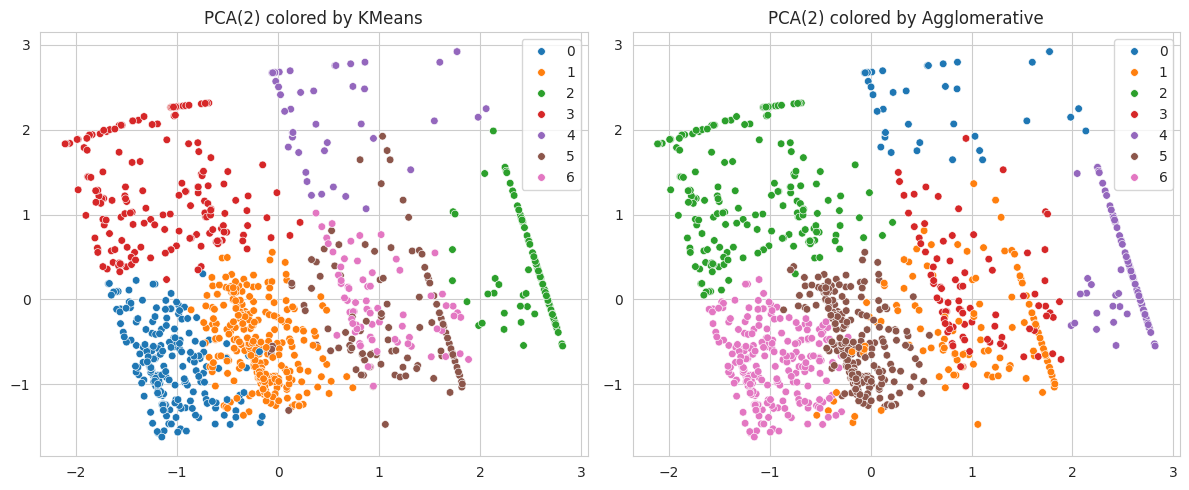

In [ ]:

# 4. Dimensionality reduction for visualization: PCA + t-SNE

print("\n=== Dimensionality Reduction: PCA & t-SNE for visualization ===")
pca = PCA(n_components=2, random_state=RND)
X_pca = pca.fit_transform(X_arr)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_km, palette='tab10', s=30, legend='full')
plt.title('PCA(2) colored by KMeans')
plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_agg, palette='tab10', s=30, legend='full')
plt.title('PCA(2) colored by Agglomerative')
plt.tight_layout()
plt.show()

Running t-SNE (this may take some seconds)...


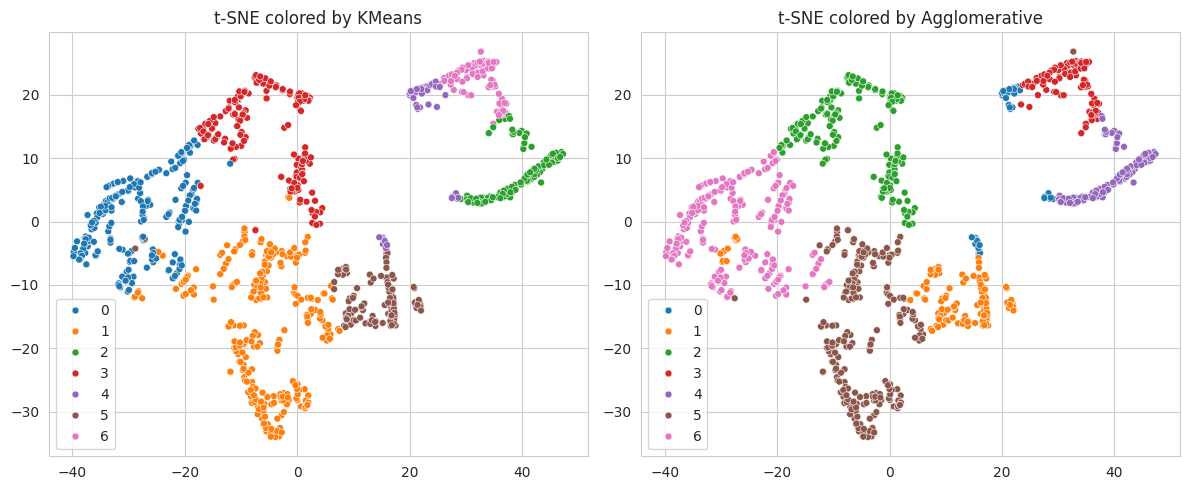

In [31]:
# t-SNE (can be slow)
print("Running t-SNE (this may take some seconds)...")
tsne = TSNE(n_components=2, random_state=RND, init='pca', learning_rate='auto', perplexity=30)
X_tsne = tsne.fit_transform(X_arr)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_km, palette='tab10', s=25, legend='full')
plt.title('t-SNE colored by KMeans')
plt.subplot(1,2,2)
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_agg, palette='tab10', s=25, legend='full')
plt.title('t-SNE colored by Agglomerative')
plt.tight_layout()
plt.show()

In [ ]:

# 5. Evaluation & comparison (internal validation)

print("\n=== Evaluation: internal validation metrics ===")
models = {
    'KMeans': labels_km,
    'Agglomerative': labels_agg,
    'DBSCAN': labels_db
}
eval_results = {}
for name, labs in models.items():
    eval_results[name] = evaluate_labels(X_arr, labs)

eval_df = pd.DataFrame(eval_results).T
print("Metrics (n_clusters, n_noise, silhouette, davies_bouldin, calinski_harabasz):")
display(eval_df[['n_clusters','n_noise','silhouette','davies_bouldin','calinski_harabasz']].round(4))



=== Evaluation: internal validation metrics ===
Metrics (n_clusters, n_noise, silhouette, davies_bouldin, calinski_harabasz):


,n_clusters,n_noise,silhouette,davies_bouldin,calinski_harabasz
KMeans,7.0,0.0,0.4195,0.8873,708.4192
Agglomerative,7.0,0.0,0.3821,0.9164,646.4545
DBSCAN,5.0,25.0,0.2714,0.8253,136.8381


In [33]:
# Rank by silhouette (descending; NaN last)
rank_by_sil = eval_df['silhouette'].sort_values(ascending=False, na_position='last')
print("\nRanking by Silhouette score:")
display(rank_by_sil)



Ranking by Silhouette score:


,silhouette
KMeans,0.419504
Agglomerative,0.382130
DBSCAN,0.271412


In [34]:
# ---------------------------
# 6. Final model selection & cluster interpretation
# ---------------------------
print("\n=== Final Model Selection & Business-friendly Cluster Interpretation ===")
best_model = rank_by_sil.index[0]
print("Best model (by silhouette):", best_model)



=== Final Model Selection & Business-friendly Cluster Interpretation ===
Best model (by silhouette): KMeans


In [35]:
# choose labels for best model
if best_model == 'KMeans':
    best_labels = labels_km
elif best_model == 'Agglomerative':
    best_labels = labels_agg
else:
    best_labels = labels_db

# Map labels to original numeric features for interpretation
df_interpret = X_raw.copy()
df_interpret['cluster'] = best_labels

print("\nCluster counts:")
display(df_interpret['cluster'].value_counts().sort_index())

print("\nCluster means (original numeric scale):")
display(df_interpret.groupby('cluster').mean().round(3))



Cluster counts:


,count
cluster,
0,211
1,287
2,107
3,171
4,45
5,106
6,73



Cluster means (original numeric scale):


,price,available,sold
cluster,,,
0,32.834,3.682,53.502
1,29.510,9.554,73.087
2,34.429,17.486,770.822
3,87.617,6.649,49.871
4,98.363,16.300,263.240
5,34.280,8.811,664.008
6,30.211,17.377,136.603


In [36]:
# Business-friendly descriptions
print("\nBusiness-friendly cluster descriptions:")
global_price_mean = df_interpret['price'].mean()
global_sold_mean = df_interpret['sold'].mean()


Business-friendly cluster descriptions:


In [37]:
for cl in sorted(df_interpret['cluster'].unique()):
    if cl == -1:
        print(f"Cluster {cl} (Noise): Atypical items/outliers that don't fit main segments — review individually.")
        continue
    mean_vals = df_interpret[df_interpret['cluster'] == cl][['price','sold','available']].mean()
    desc = f"Cluster {cl}: Avg price={mean_vals['price']:.2f}, Avg sold={mean_vals['sold']:.1f}, Avg available={mean_vals['available']:.1f}."
    # simple rule-based interpretation
    if (mean_vals['price'] > global_price_mean) and (mean_vals['sold'] > global_sold_mean):
        desc += " Premium & popular fragrances — high price and high sales (potential brand hits)."
    elif (mean_vals['price'] > global_price_mean) and (mean_vals['sold'] <= global_sold_mean):
        desc += " High-priced / low-sales — niche premium items; consider targeted promotion."
    elif (mean_vals['price'] <= global_price_mean) and (mean_vals['sold'] > global_sold_mean):
        desc += " Budget bestsellers — good for volume offers and promotions."
    else:
        desc += " Lower price & lower sales — long-tail or low-demand items; consider clearance or bundle strategies."
    print(desc)

print("\n=== End of full pipeline ===")

Cluster 0: Avg price=32.83, Avg sold=53.5, Avg available=3.7. Lower price & lower sales — long-tail or low-demand items; consider clearance or bundle strategies.
Cluster 1: Avg price=29.51, Avg sold=73.1, Avg available=9.6. Lower price & lower sales — long-tail or low-demand items; consider clearance or bundle strategies.
Cluster 2: Avg price=34.43, Avg sold=770.8, Avg available=17.5. Budget bestsellers — good for volume offers and promotions.
Cluster 3: Avg price=87.62, Avg sold=49.9, Avg available=6.6. High-priced / low-sales — niche premium items; consider targeted promotion.
Cluster 4: Avg price=98.36, Avg sold=263.2, Avg available=16.3. Premium & popular fragrances — high price and high sales (potential brand hits).
Cluster 5: Avg price=34.28, Avg sold=664.0, Avg available=8.8. Budget bestsellers — good for volume offers and promotions.
Cluster 6: Avg price=30.21, Avg sold=136.6, Avg available=17.4. Lower price & lower sales — long-tail or low-demand items; consider clearance or b